We will perform some operations on the data to understand it's features better. In the first step we will read the data.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from itertools import chain

# Load dataset
df = pd.read_csv(r"D:\Machine_Learning_projects\sentiment_analysis\data\tweets.csv", encoding="ISO-8859-1")
# Basic exploration
print(df.info())
print(df.head())

# Check missing values
print("Missing values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column                                                                                                               Non-Null Count    Dtype 
---  ------                                                                                                               --------------    ----- 
 0   0                                                                                                                    1599999 non-null  int64 
 1   1467810369                                                                                                           1599999 non-null  int64 
 2   Mon Apr 06 22:19:45 PDT 2009                                                                                         1599999 non-null  object
 3   NO_QUERY                                                                                                             1599999 non-null  object
 4   _

From above output, we understand that there are no column names in the given dataset. Thus we need to add column names for further analysis of data.  

In the following code we will add the column names. 

In [17]:
column_names = ["target", "ids", "date", "flag", "user", "text"]
df = pd.read_csv(r"D:\Machine_Learning_projects\sentiment_analysis\data\tweets.csv", encoding="ISO-8859-1", names=column_names, header=None)

Now, we will see the distribution of text lengths. 

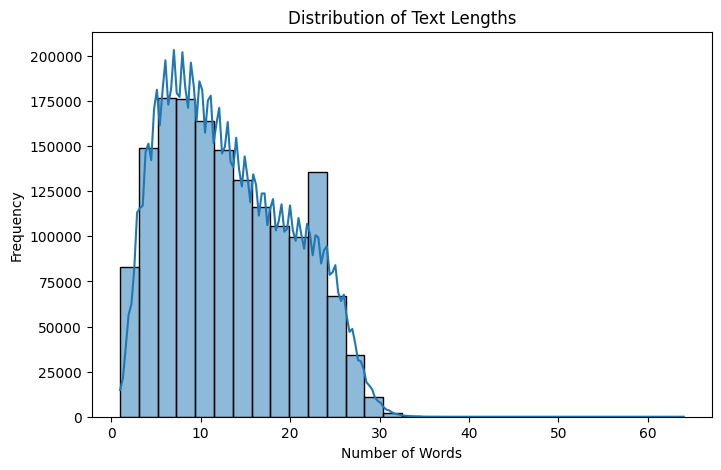

In [18]:
df["text_length"] = df["text"].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(8, 5))
sns.histplot(df["text_length"], bins=30, kde=True)
plt.title("Distribution of Text Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


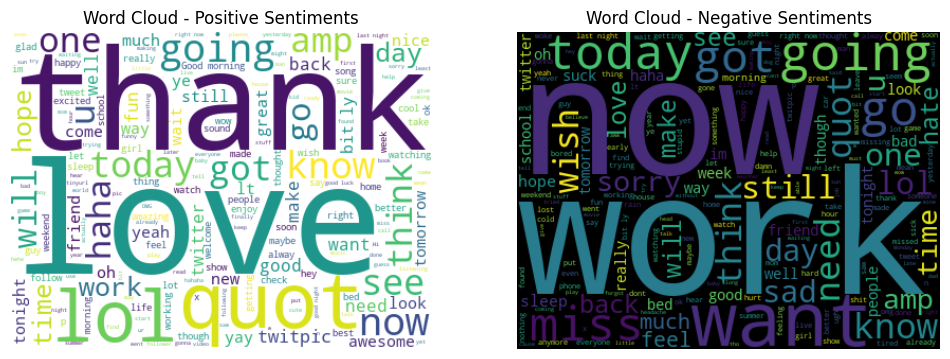

In [21]:
positive_text = " ".join(df[df["target"] == 4]["text"])
negative_text = " ".join(df[df["target"] == 0]["text"])

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
wordcloud_pos = WordCloud(width=400, height=300, background_color="white").generate(positive_text)
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Positive Sentiments")

plt.subplot(1, 2, 2)
wordcloud_neg = WordCloud(width=400, height=300, background_color="black").generate(negative_text)
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Negative Sentiments")

plt.show()


From above wordcloud, we can see that positive sentiments have lot of words like "love" and "thank". On the other hand, negative sentiments have words like "now", "work" and "want", many times. 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\svaid\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


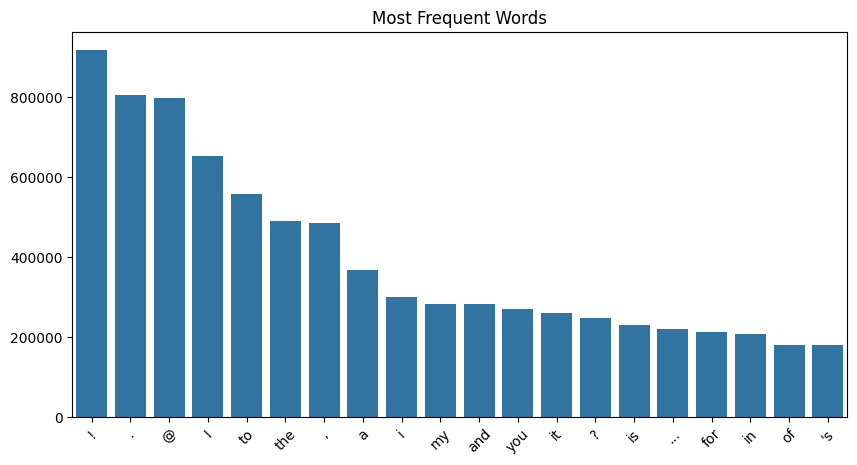

In [22]:
nltk.download("punkt")

all_words = list(chain(*df["text"].apply(word_tokenize)))
word_freq = Counter(all_words)

# Top 20 words
common_words = word_freq.most_common(20)

words, counts = zip(*common_words)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(words), y=list(counts))
plt.xticks(rotation=45)
plt.title("Most Frequent Words")
plt.show()


From above output, it is evident that there are lot of characters that are not useful. Thus data cleaning is essential step in this project. Too many words without any real meaning can negatively affect the model training. 

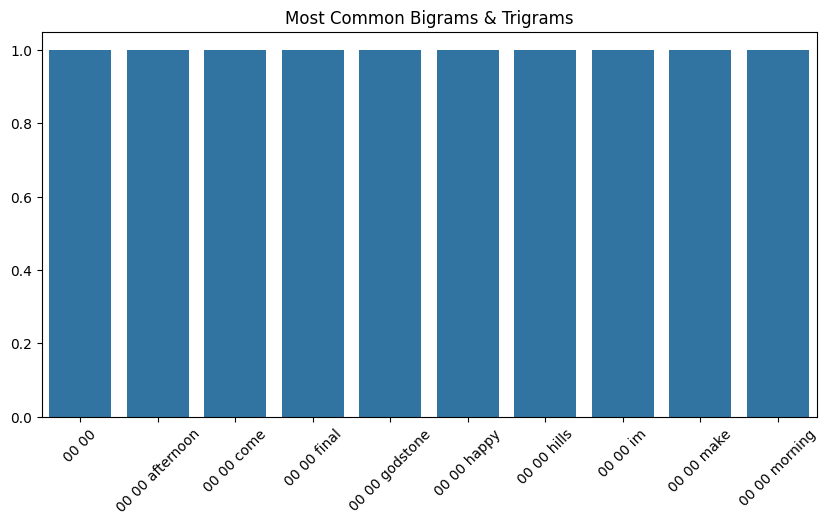

In [23]:
vectorizer = CountVectorizer(ngram_range=(2, 3), stop_words="english")
X = vectorizer.fit_transform(df["text"])

# Get most common bigrams/trigrams
ngrams_freq = Counter(vectorizer.get_feature_names_out()).most_common(10)

ngrams, counts = zip(*ngrams_freq)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(ngrams), y=list(counts))
plt.xticks(rotation=45)
plt.title("Most Common Bigrams & Trigrams")
plt.show()


As this was not useful to provide any information on the data. This is because the data has lot of numeric values along with words. We need to clean it, before understanding common connecting words from the data. 

C:\Users\svaid\AppData\Local\Temp\ipykernel_15476\1069415131.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["target"], palette="coolwarm")


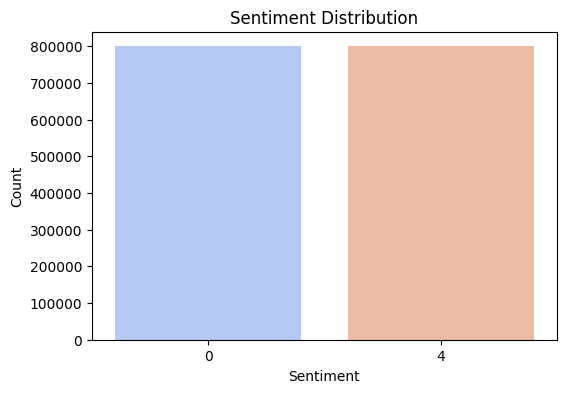

In [25]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["target"], palette="coolwarm")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


The positive and negative sentiments have almost same count. This shows that dataset is very well balanced. 

From above analysis, we can proceed with the data preprocessing. We can view more graphs on cleaned data as well in the next steps. 

In [28]:
df1 = pd.read_csv(r"D:\Machine_Learning_projects\sentiment_analysis\data\processed_tweets.csv", encoding="ISO-8859-1")

df1.head()

,target,ids,date,flag,user,text,cleaned_text
0,0,2176706787,Mon Jun 15 04:33:38 PDT 2009,NO_QUERY,SweetLiLMina,@backstreetboys is the voting thing over? Why ...,backstreetboys voting thing ca nt vote anymore...
1,0,2216637491,Wed Jun 17 19:45:58 PDT 2009,NO_QUERY,BrickShasha,@restey11 nursing my back,restey nursing back
2,0,2211280115,Wed Jun 17 12:39:39 PDT 2009,NO_QUERY,heathergerlitz,has a monster migrane and has 2 hours of work ...,monster migrane hours work left
3,4,1678945005,Sat May 02 08:08:22 PDT 2009,NO_QUERY,JoXtra,Good morning Tweets! Have a great weekend!,good morning tweets great weekend
4,4,1834895040,Mon May 18 04:32:31 PDT 2009,NO_QUERY,BendyWalker,Watching an episode of Big Love with turkey sa...,watching episode big love turkey sandwiches qu...


Above is the cleaned and processed data. Column 'cleaned_text' has cleaned entries. 

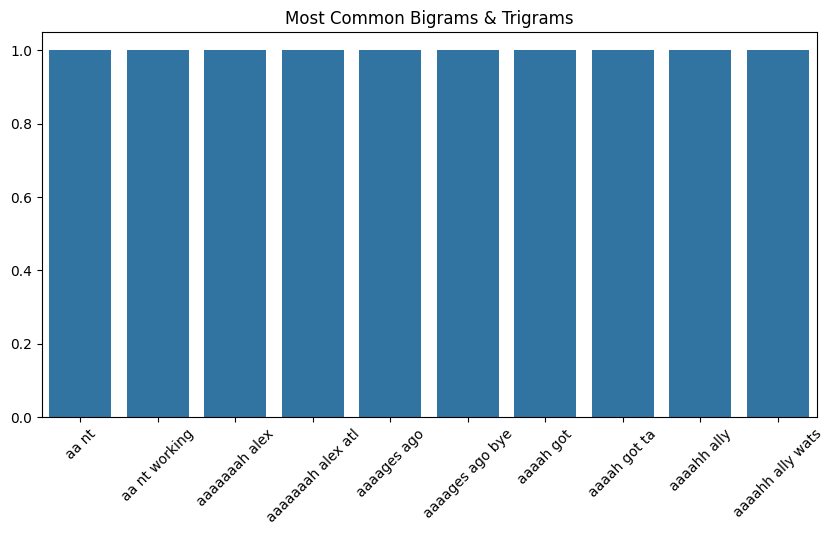

In [31]:

df1["cleaned_text"] = df1["cleaned_text"].fillna("")
vectorizer = CountVectorizer(ngram_range=(2, 3), stop_words="english")
X = vectorizer.fit_transform(df1["cleaned_text"])

# Get most common bigrams/trigrams
ngrams_freq = Counter(vectorizer.get_feature_names_out()).most_common(10)

ngrams, counts = zip(*ngrams_freq)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(ngrams), y=list(counts))
plt.xticks(rotation=45)
plt.title("Most Common Bigrams & Trigrams")
plt.show()


Here, again we see a lot of n-grams without any meaning are in the data. We need to further process this data to make it ready for ML pipeline. 